In [90]:
import pandas as pd
import platform
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
DIR = '../../Data/'
FILE = DIR+'daegu_utf8.csv'

In [20]:
df = pd.read_csv(FILE)
df

,날짜,지점,평균기온,최저기온,최고기온
0,1909-01-01,143,-4.1,-8.0,0.1
1,1909-01-02,143,-0.8,-6.7,6.1
2,1909-01-03,143,1.0,-2.4,3.6
3,1909-01-04,143,4.2,0.0,9.2
4,1909-01-05,143,3.4,-0.4,9.0
...,...,...,...,...,...
41445,2022-06-26,143,28.4,24.4,32.8
41446,2022-06-27,143,27.3,25.4,30.1
41447,2022-06-28,143,28.9,24.8,32.3
41448,2022-06-29,143,29.5,27.7,33.7


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41450 entries, 0 to 41449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      41450 non-null  object 
 1   지점      41450 non-null  int64  
 2   평균기온    41450 non-null  float64
 3   최저기온    41450 non-null  float64
 4   최고기온    41450 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [22]:
df['날짜'] = pd.to_datetime(df['날짜'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41450 entries, 0 to 41449
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41450 non-null  datetime64[ns]
 1   지점      41450 non-null  int64         
 2   평균기온    41450 non-null  float64       
 3   최저기온    41450 non-null  float64       
 4   최고기온    41450 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.6 MB


시작 연도를 입력하세요: 2010
마지막 연도를 입력하세요: 2021
기온 변화를 측정한 달을 입력하세요: 12
2010 년부터 2021 까지의 12 월의 기온 변화
12월 최저기온 평균 :
[-2.5, -1.5, -3.9, -0.5, -2.8, 0.5, -0.6, -4.0, -2.3, -1.0, -3.1, -2.1]
12월 최고기온 평균 :
[7.3, 6.9, 3.9, 8.1, 5.8, 9.0, 8.7, 5.8, 7.0, 9.0, 7.2, 8.9]


C:\Users\ss\AppData\Local\Temp\ipykernel_6564\3658820361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  periodmonth['Year'] = periodmonth['날짜'].dt.year                # 새로운 Year 컬럼 만든 후 년도별 그룹화


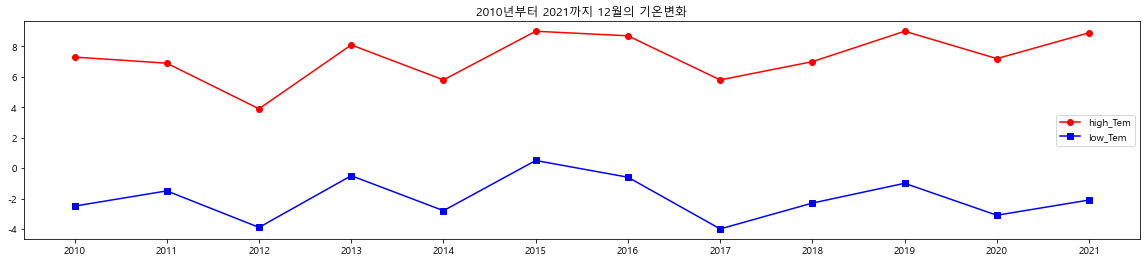

In [92]:
s_year = int(input('시작 연도를 입력하세요: '))  
l_year = int(input('마지막 연도를 입력하세요: '))
tem_month = int(input('기온 변화를 측정한 달을 입력하세요: '))   # 시작 연도, 마지막 연도, 달 입력

startdf = df[df['날짜'].dt.year >= s_year]  
lastdf = df[df['날짜'].dt.year <= l_year]   
perioddf = pd.merge(startdf,lastdf, how='inner')                 # 중복되는 기간 merge
periodmonth = perioddf[perioddf['날짜'].dt.month==tem_month]
periodmonth['Year'] = periodmonth['날짜'].dt.year                # 새로운 Year 컬럼 만든 후 년도별 그룹화
temp_mean = periodmonth.groupby(['Year']).mean()                 # 평균값 
min_temp_mean = round(temp_mean['최저기온'],1)
max_temp_mean = round(temp_mean['최고기온'],1)

min_list = min_temp_mean.to_list()                               # 시리즈 => 리스트 변환
max_list = max_temp_mean.to_list()
print(f'{s_year} 년부터 {l_year} 까지의 {tem_month} 월의 기온 변화')
print('12월 최저기온 평균 :')
print(min_list)
print('12월 최고기온 평균 :')
print(max_list)
    
    
plt.figure(figsize=(20, 4))
plt.plot(max_temp_mean.index, max_temp_mean, 'r', marker='o', label='high_Tem')
plt.plot(min_temp_mean.index, min_temp_mean, 'blue',marker='s', label='low_Tem')
if platform.system() == 'Windows':
    font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
    plt.rc('font', family=font_name)
        # plt.rc(‘font’, family=‘Malgun Gothic’, size=8) # 간단히 맑은 고딕으로 설정
else:
        # MacOS
    plt.rc('font', family='AppleGothic', size=8) # 한글 폰트 사용 For Mac OS

plt.rcParams['axes.unicode_minus'] = False
plt.title(f'{s_year}년부터 {l_year}까지 {tem_month}월의 기온변화')
plt.xticks(np.arange(s_year, l_year+1, step=1)) # x축 범위 및 간격 설정
plt.legend(loc=0)
plt.show()